# Import used modules

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../src')
import benchmark_utils as bu
import analysis_utils as au

# Run Alignments for OpenCADD.superposition for the CAMK Structures

Perform all pairwise alignments for the given sample structures. Every method performs 1225 alignments for the 50 CAMK structures. The benchmark is done with an Intel Core i5-1038NG7 CPU and 16 GB of RAM.

In [2]:
# richtiger path
#bu.run_alignments(sample1_path="/Users/julian/PythonProjects/Bachelor/benchmark/TK_samples.txt",
#                  output_path="")

# Create a Dataframe containing the Alignments of all five Methods

The alignments for PyMol and ChimeraX MatchMaker are done in the respectively programs and are saved in seperate files. For the analysis, the DataFrames are combined.

In [3]:
columns = ["reference_id", "mobile_id", "method", "rmsd", 
           "coverage", "reference_size", "mobile_size", "time", 
           "SI", "MI", "SAS", "ref_name", "ref_group", "ref_species", 
           "ref_chain", "mob_name", "mob_group", "mob_species", "mob_chain"]
superposer_CAMK_DFGin = pd.read_csv("../data/OpenCADD_results/20211107_superposer_benchmark_CAMK_DFGin_rerun.csv", names=columns)
pymol_CAMK_DFGin = pd.read_csv("../data/PyMol_results/20211107_pymol_benchmark_CAMK_DFGin.csv", names=columns)
chimerax_CAMK_DFGin = pd.read_csv("../data/ChimeraX_results/20211107_mmaker_benchmark_CAMK_DFGin.csv", names=columns)
all_CAMK_DFGin = pd.concat([superposer_CAMK_DFGin, pymol_CAMK_DFGin, chimerax_CAMK_DFGin]).reset_index(drop=True)

# Analysis

## General Checks

In [4]:
counts, nans, times = au.general_checks(all_CAMK_DFGin)

Check if every value is present.
It should be 1225 for every value, because there are 1225 alignments performed per method.

In [5]:
counts

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain
method,,,,,,,,,,,,,,,,,,
matchmaker,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
mda,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
mmligner,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
pymol,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
theseus,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225


Next, we check for missing alignments. Some Methods have problems with some structures. 

In this case, all alignments worked and there is no alignment missing.

In [6]:
nans

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain
method,,,,,,,,,,,,,,,,,,


During the computation of the alignments, the time is measured.  For all OpenCADD methods combined the CPU-time is about 3.5 hours. The time for downloading the structures is not included.

In [7]:
times

method
matchmaker      8.404495
mda             5.787528
mmligner      198.393833
pymol           0.411117
theseus         6.704893
Name: time, dtype: float64

### Compute the relative Coverage

The relative coverage is computed the following way:

coverage / min(lenght of structure 1, lenght of structure 2)

In [8]:
au.compute_rel_cov(all_CAMK_DFGin)

## Create basic plots

It is easy to see in both plots, that MMLigner performs the best overall. Besides that, Theseus performs very similar to ChimeraX MatchMaker and PyMol align.
Every method except MMLigner has some alignments with very bad results (RMSD about 20). 

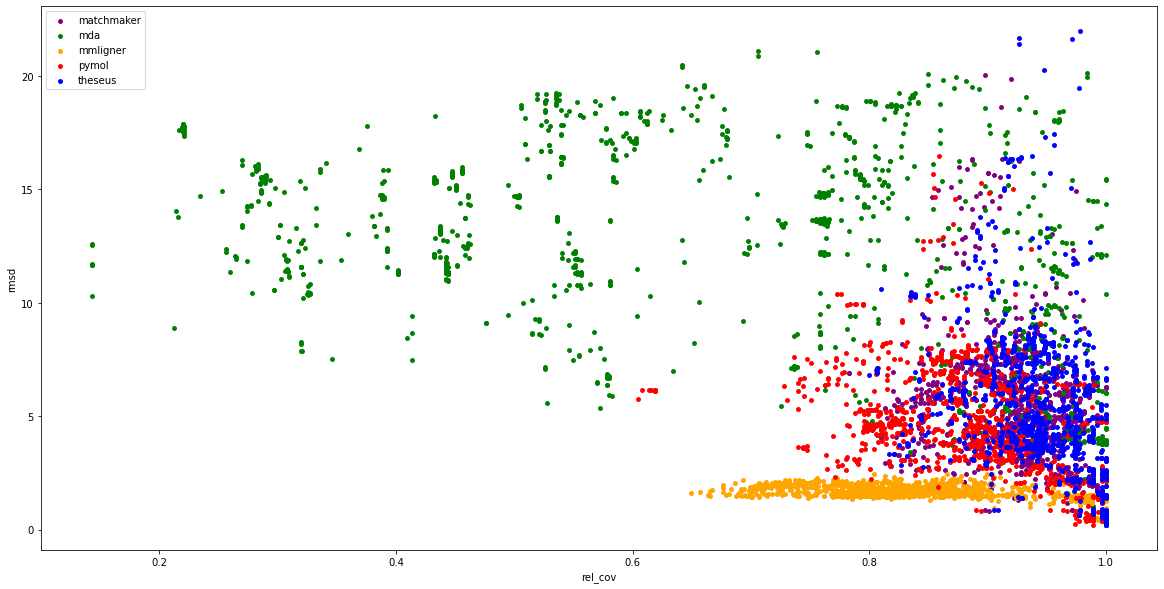

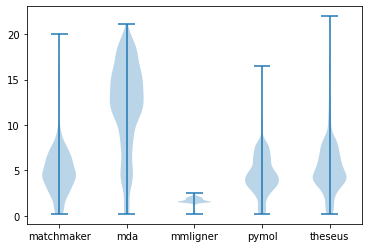

In [9]:
au.create_scatter_plot(all_CAMK_DFGin)
au.create_violine_plot(all_CAMK_DFGin)

## Check if data is normally distributed

In [10]:
#p-value < 0.5 --> not norm

Both, the Shapiro-Wilk-Test and the Kolmogorov-Smirnow-Test show, that the values for RMSD, SI, MI, SAS and relative coverage are not normally distributed. But Theseus has a very similar distribution for the measures except the relative coverage. MMLigner performs the best for all measures except the relative coverage. MDA performs the worst for all measures.

/Users/julian/opt/anaconda3/envs/opencadd/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8683643341064453, pvalue=0.0)
ShapiroResult(statistic=0.6497761011123657, pvalue=0.0)
ShapiroResult(statistic=0.9081578850746155, pvalue=0.0)
ShapiroResult(statistic=0.6494259238243103, pvalue=0.0)
KstestResult(statistic=0.852516175134735, pvalue=0.0)
KstestResult(statistic=0.8608928705516011, pvalue=0.0)
KstestResult(statistic=0.6223163158842621, pvalue=0.0)
KstestResult(statistic=0.6411655880837767, pvalue=0.0)


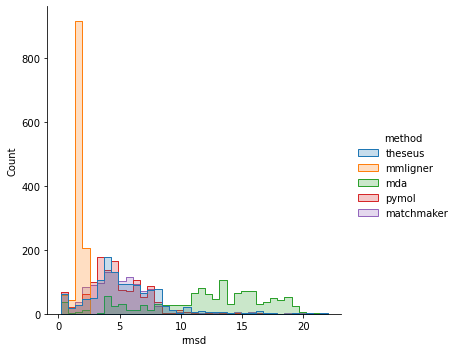

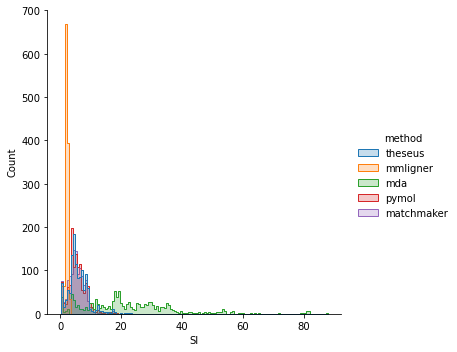

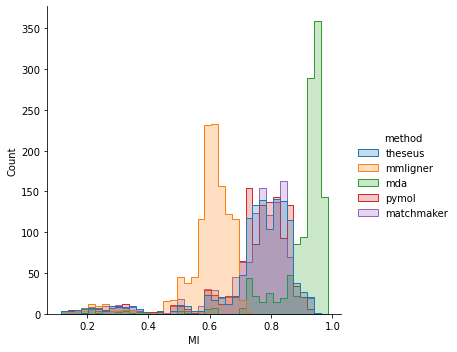

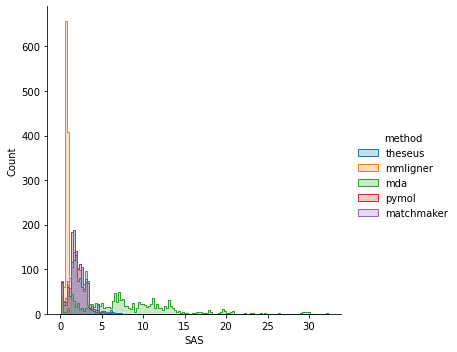

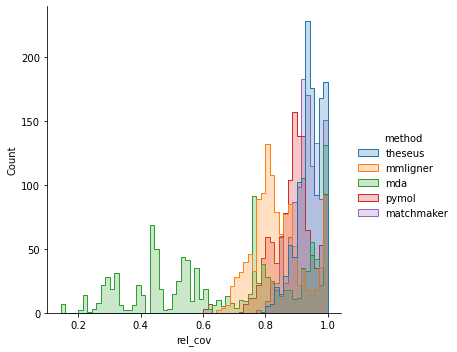

In [11]:
dist_tests = au.check_distribution(all_CAMK_DFGin)

## Compute Correlation

Since the data is not distributed normally, the spearman correlation is used.

The three quality measures correlate very well with each other and with the rmsd. The quality measures also negatively correlate with the relative coverage, which means, the lower the relative coverage, the higher the quality measures. 

The time also negatively correlates with the quality measures, which means taking more time for an alignment produces better results. This correlation in this case is highly biased by MMLigner. It takes much more time than the other methods, but also yield overall the best results.

All three quality measures share the property, that lower values mean better alignments.

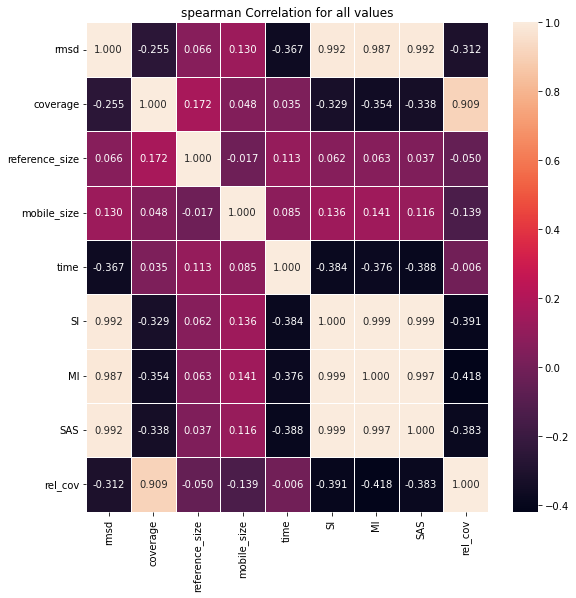

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
rmsd,1.000000,-0.255495,0.065967,0.130235,-0.366766,0.991873,0.986876,0.991678,-0.312424
coverage,-0.255495,1.000000,0.172265,0.048410,0.034646,-0.329365,-0.353649,-0.338337,0.908981
reference_size,0.065967,0.172265,1.000000,-0.017324,0.112604,0.061877,0.062902,0.037300,-0.049771
mobile_size,0.130235,0.048410,-0.017324,1.000000,0.085043,0.135785,0.141468,0.116204,-0.139169
time,-0.366766,0.034646,0.112604,0.085043,1.000000,-0.384005,-0.375743,-0.387910,-0.005814
SI,0.991873,-0.329365,0.061877,0.135785,-0.384005,1.000000,0.998764,0.998857,-0.390705
MI,0.986876,-0.353649,0.062902,0.141468,-0.375743,0.998764,1.000000,0.997199,-0.418221
SAS,0.991678,-0.338337,0.037300,0.116204,-0.387910,0.998857,0.997199,1.000000,-0.383155
rel_cov,-0.312424,0.908981,-0.049771,-0.139169,-0.005814,-0.390705,-0.418221,-0.383155,1.000000


In [12]:
corr = au.compute_correlation(all_CAMK_DFGin, coeff="spearman")
corr

In [13]:
# nullhypo = alle gleich
#p vlaue < 0.05 --> statisch signifikant

## Check for significant differences

Because the data is not normally distributed, an ANOVA is not suitable. Therefore the Kruskal-Wallis-Test is performed. The RMSD and the three quality measures are significantly different for the groups.

In [14]:
kruskal = au.compute_kruskal(all_CAMK_DFGin)

Kruskal Wallis results for RMSD:
KruskalResult(statistic=3221.8303685162086, pvalue=0.0)


Kruskal Wallis results for Similarity Index (SI):
KruskalResult(statistic=3140.0623231219447, pvalue=0.0)


Kruskal Wallis results for Match Index (MI):
KruskalResult(statistic=3025.4321646060066, pvalue=0.0)


Kruskal Wallis results for Structural Alignment Score (SAS):
KruskalResult(statistic=3146.339300550654, pvalue=0.0)


# Which group different

The statistics show, that all groups are significantly different from each other. Looking at the diagrams above it is still noticable, that PyMol, ChimeraX and Theseus are in the same area.

In [15]:
significant, non_significant = au.compute_mannwhitneyu(all_CAMK_DFGin)

All significant results:
Result for rmsd with theseus and pymol:
MannwhitneyuResult(statistic=863739.0, pvalue=9.244651733203049e-11)
Result for rmsd with theseus and mmaker:
MannwhitneyuResult(statistic=809155.0, pvalue=0.0007765690579676084)
Result for rmsd with theseus and mmligner:
MannwhitneyuResult(statistic=1384150.0, pvalue=5.199989608888202e-287)
Result for rmsd with theseus and mda:
MannwhitneyuResult(statistic=212069.0, pvalue=1.4679234012543947e-207)
Result for rmsd with pymol and mmaker:
MannwhitneyuResult(statistic=702196.5, pvalue=0.005990082604265733)
Result for rmsd with pymol and mmligner:
MannwhitneyuResult(statistic=1372037.5, pvalue=3.1531875924231303e-276)
Result for rmsd with pymol and mda:
MannwhitneyuResult(statistic=164510.0, pvalue=1.8047214796601762e-245)
Result for rmsd with mmaker and mmligner:
MannwhitneyuResult(statistic=1366980.5, pvalue=8.690987268755958e-272)
Result for rmsd with mmaker and mda:
MannwhitneyuResult(statistic=192222.0, pvalue=5.43884638

# Count the best alignments

For every pair of structures, the method that has the best quality measure is selected. The following statistics show how often a method had the best results for the quality measures.

In [16]:
best_results = au.count_best_results(all_CAMK_DFGin)

Counts of best values for the Similarity Index (SI):
mmligner      1158
matchmaker      56
pymol           17
mda              7
theseus          2
Name: method, dtype: int64


Counts of best values for the Match Index (MI):
mmligner      1156
matchmaker      44
pymol           16
mda              6
theseus          3
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS):
mmligner      1148
matchmaker      53
pymol           17
mda              5
theseus          2
Name: method, dtype: int64


Counts of best values for the Similarity Index (SI) without MMLigner:
matchmaker    576
pymol         452
theseus       174
mda            24
Name: method, dtype: int64


Counts of best values for the Match Index (MI) without MMLigner:
matchmaker    585
pymol         416
theseus       201
mda            23
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS) without MMLigner:
matchmaker    576
pymol         452
theseus  